In [1]:
# importing required libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Data for the case is available in CSV format having 6362620 rows and 10 columns. 


In [2]:
# loading of the data

data=pd.read_csv('Fraud.csv')

## Basic View

Prints first 5 rows of the data

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Prints last 5 rows of the data


In [4]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
# view of some basic statistical details

data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
# a concise summary of a DataFrame.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
# the number columns and rows that the data consists

data.shape

(6362620, 11)

## Domain Analysis

In [8]:
# displays all the columns

data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

"step" - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

"type" - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

"amount" - amount of the transaction in local currency.

"nameOrig" - customer who started the transaction.

"oldbalanceOrg" - initial balance before the transaction.

"newbalanceOrig" - new balance after the transaction.

"nameDest" - customer who is the recipient of the transaction.

"oldbalanceDest" - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

"newbalanceDest" - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

"isFraud" - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

"isFlaggedFraud" - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

## Data Preprocessing

### 1. Data cleaning including missing values, outliers.

In [9]:
# detect missing values in the given series object. 

data.isnull().values.any()

False

In [10]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
# Missing values gets mapped to True and non-missing value gets mapped to False 

data.isna().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [12]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [13]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [14]:
data.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [15]:
dfisFraud = data.loc[data.isFraud == 1]
dfisFraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [16]:
dataflagfraud= data.loc[data.isFlaggedFraud == 1]
dataflagfraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1


In [17]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### There are too much of outliers so we cannot impute them. We have to take outliers as our original data.


<AxesSubplot:xlabel='type', ylabel='count'>

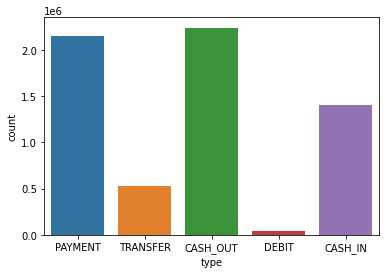

In [18]:
# for discrete data
sns.countplot(data.type)

## Exploratory Data Analysis

In [19]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data,title="Pandas Profiling Report", minimal=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
data.describe(include=['object'])

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1677795071,C1286084959
freq,2237500,3,113


In [21]:
#converting categorical features to numerical

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data.type=label.fit_transform(data.type)
data.nameOrig=label.fit_transform(data.nameOrig)
data.nameDest=label.fit_transform(data.nameDest)

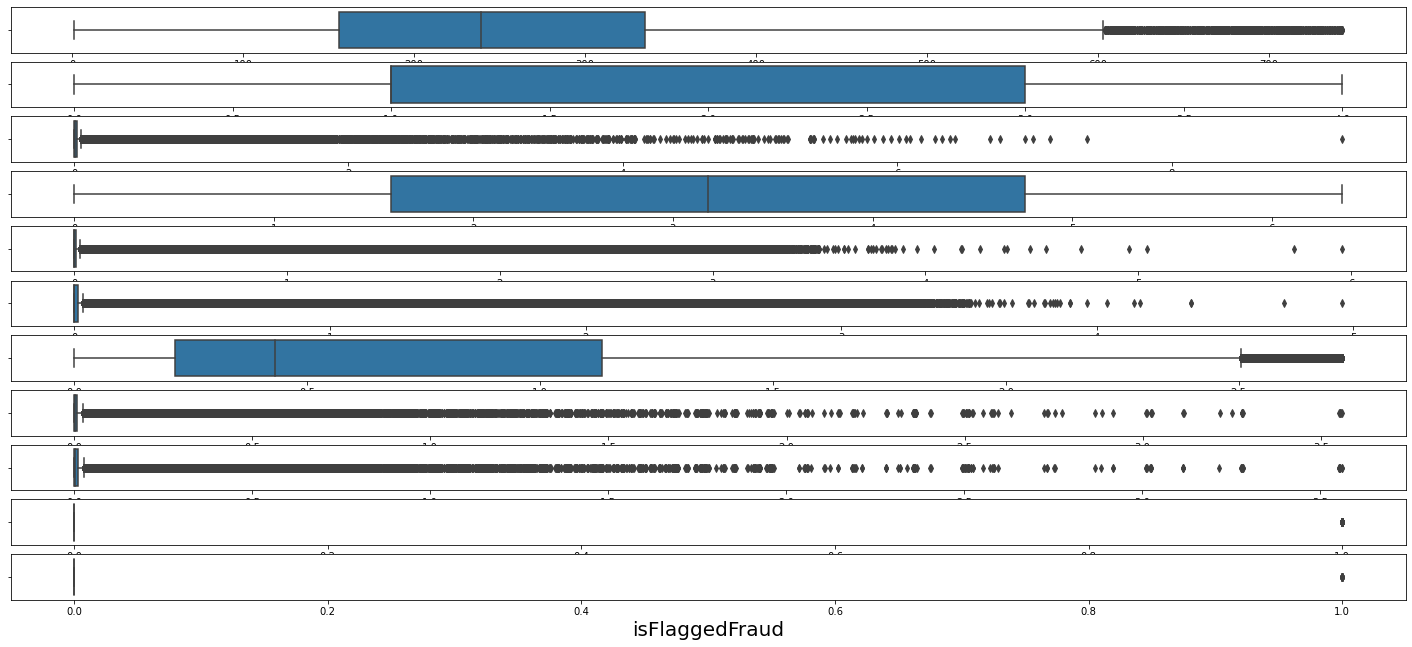

In [22]:
# checking the outliers if any outliers detection can be normally plotted using boxplot

box=data[['step', 'type', 'amount', 'nameOrig', 
          'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']]
plt.figure(figsize=(25,25), facecolor='white')
plotnumber = 1

for column in box:
    if plotnumber<=25 :     
        ax = plt.subplot(25,1,plotnumber)
        sns.boxplot(x=box[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


## Feature Selection

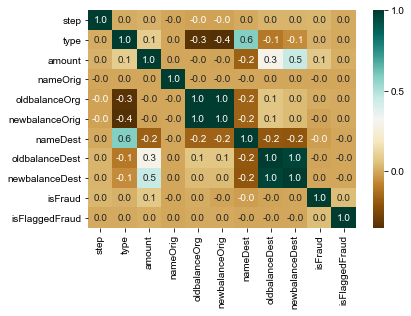

In [24]:
#cmap stands for colormap. It's a colormap instance.

sns.heatmap(data.corr(), annot=True, fmt= '.1f', cmap="BrBG")
sns.set(font_scale=2.25)
plt.show()

In [25]:
# displays the correlated data 

corr_matrix = data.corr()
corr_matrix["isFlaggedFraud"].sort_values(ascending=False)

isFlaggedFraud    1.000000
isFraud           0.044109
amount            0.012295
oldbalanceOrg     0.003835
newbalanceOrig    0.003776
step              0.003277
type              0.002685
nameOrig          0.000667
oldbalanceDest   -0.000513
newbalanceDest   -0.000529
nameDest         -0.001122
Name: isFlaggedFraud, dtype: float64

### Q. How did you select variables to be included in the model?

Ans: We select the variables by checking correlation between target variable and remaining variable 

### Q.  Model building

In [28]:
#creating independent and dependent variables X & y

X = data.loc[:,['isFraud','amount','oldbalanceOrg','newbalanceOrig','step','type','nameOrig']]
y = data.isFlaggedFraud

In [29]:
X.head()

,isFraud,amount,oldbalanceOrg,newbalanceOrig,step,type,nameOrig
0,0,9839.64,170136.0,160296.36,1,3,757869
1,0,1864.28,21249.0,19384.72,1,3,2188998
2,1,181.00,181.0,0.00,1,4,1002156
3,1,181.00,181.0,0.00,1,1,5828262
4,0,11668.14,41554.0,29885.86,1,3,3445981


In [30]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: isFlaggedFraud, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
# Splitting the data into test and train for calculating accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [33]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4453834, 7), (1908786, 7), (4453834,), (1908786,))

In [34]:
from scipy.stats import skew
from scipy.stats import kurtosis

isFraud
769.7023761366951


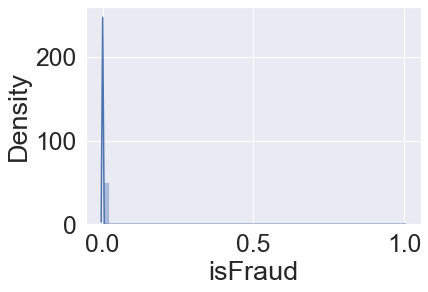

amount
1797.9552914598337


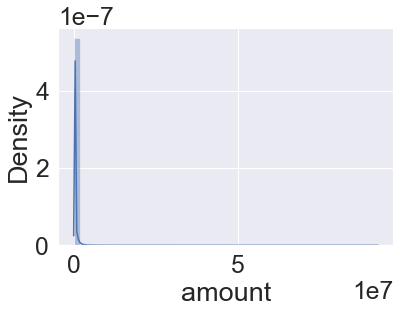

oldbalanceOrg
32.9648516960387


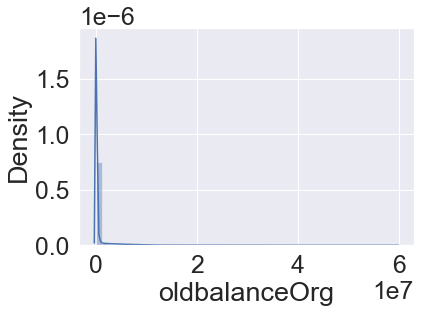

newbalanceOrig
32.06695841776864


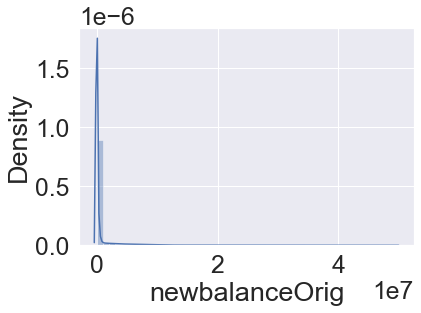

step
0.3290693534211582


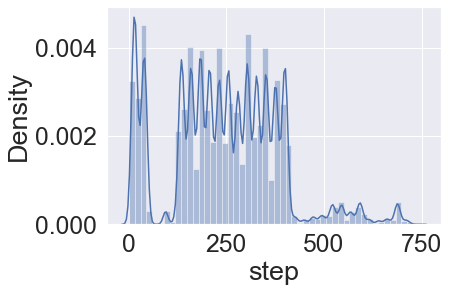

type
-1.4345763413580779


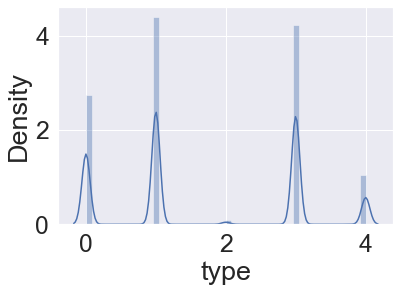

nameOrig
-1.2000279621839782


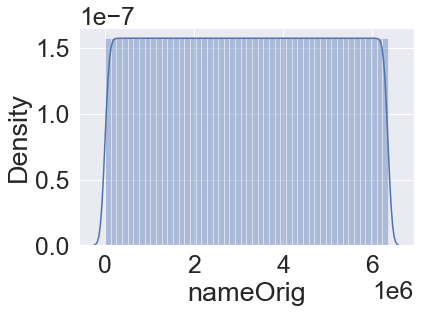

In [35]:
for col in X_train:
    print(col)
    print(kurtosis(data[col]))
    
    plt.figure()
    sns.distplot(data[col])
    plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### DECISION TREE

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
dtree=DecisionTreeRegressor(max_depth=25)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=25)

In [39]:
dtree.score(X_train, y_train)

1.0

In [40]:
dtree.score(X_test, y_test)

0.7142846664954787

In [41]:
p_test = dtree.predict(X_test)

In [42]:
def mae(p, t):
    return np.sum(np.abs(p - t)) / len(p)

In [43]:
mae(p_test, y_test)

1.0477863940745583e-06

In [44]:
def print_score(mm):
    print("train r^2 " + str(mm.score(X_train, y_train)))
    print("validation r^2 " + str(mm.score(X_test, y_test)))
    p_test = mm.predict(X_test)
    p_train = mm.predict(X_train)
    print("mean absolute error(Train): " + str(mae(p_train, y_train)))
    print("mean absolute error(Validation): " + str(mae(p_test, y_test)))
print_score(dtree)

train r^2 1.0
validation r^2 0.7142846664954787
mean absolute error(Train): 0.0
mean absolute error(Validation): 1.0477863940745583e-06


In [45]:
p_test = dtree.predict(X_test)

In [46]:
p_test

array([0., 0., 0., ..., 0., 0., 0.])

### Q.  What are the key factors that predict fraudulent customer?

Ans: The key factors that helps in predicting fraudulent customer are isFraud and amount

### Q. Do these factors make sense? If yes, How? If not, How not?

Ans: Yes,they make sense. If the amount is more we can assume it may be fraud and if isfraud is 1, the chances of its isFlaggedFraud is more.

### Q. What kind of prevention should be adopted while company update its infrastructure?

Ans: The prevention should be setting limit to amount transaction, if it extends the limit the person should contact company to verify.

### Q. Assuming these actions have been implemented, how would you determine if they work?

Ans: If these actions are implemented, it feels that it'll work better than current situation.